# Foundations of Machine Learning Models

## Assignment: Classification System Metrics

#### Name: Richard Lee


## Assignment Details

The purpose of this assignment is to familiarize you with the metrics used to measure prediction performance in classification systems.  Suppose there 20 binary observations whose target values are:

$$[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]$$

Suppose that your machine learning model returns prediction probabilities ([predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) in sklearn) of:

$$[0.886, 0.375, 0.174, 0.817, 0.574, 0.319, 0.812, 0.314, 0.098, 0.741, 0.847, 0.202, 0.31 , 0.073, 0.179, 0.917, 0.64 , 0.388, 0.116, 0.72]$$



# Calculate Model Predictions

Begin by writing a function from scratch called `predict()` that accepts as input the following (in this exact order):
- a list of prediction probabilities (as a list)
- threshold value (as a float)

This function should compute the final predictions to be output by the model and return them as a list.  If a prediction probability value is less than or equal to the threshold value, then the prediction is the negative case (i.e. 0).  If a prediction probability value is greater than the threshold value, then the prediction is the positive case (i.e. 1).

In [1]:
def predict(prediction_probabilities, threshold):
    predictions = []
    for probability in prediction_probabilities:
        if probability <= threshold:
            predictions.append(0)
        else:
            predictions.append(1)
    return predictions

Next, we will create a list of prediction probabilities (as given in the Assignment Details section) called `probs` and a variable called `thresh` that has the value 0.5.  Then invoke the `predict()` function to calculate the model predictions using those variables.  Save this output as `preds` and print it out.

In [2]:
# prediction probabilities
probs = [0.886,0.375,0.174,0.817,0.574,0.319,0.812,0.314,0.098,0.741,
         0.847,0.202,0.31,0.073,0.179,0.917,0.64,0.388,0.116,0.72]

# threshold value
thresh = 0.5

# prediction values
preds = predict(probs, thresh)

print("Model Predictions: ", preds)

Model Predictions:  [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]


# Calculate the Model Accuracy

Write a function from scratch called `acc_score()` that accepts as input (in this exact order):
- a list of true labels 
- a list of model predictions

This function should calculate the model accuracy score using the true labels as compared to the predictions.

In [3]:
def acc_score(true_labels, predictions):
    assert len(true_labels) == len(predictions), "The lengths of true labels and predictions must be equal."
    correct_predictions = sum([true == pred for true, pred in zip(true_labels, predictions)])
    accuracy = correct_predictions / len(true_labels)
    return accuracy

Now, compute the accuracy score using your function `acc_score()`, and pass as input the true labels (listed below as `labels`) and the model predictions you calculated above (`preds`).  

In [4]:
# true labels
labels = [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]

accuracy = acc_score(labels, preds)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.85


**Code Check:** Use the Scikit-Learn's [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to check that the value you computed using `acc_score()` is correct.

In [5]:
from sklearn.metrics import accuracy_score

# Calculate accuracy using sklearn's function
sklearn_accuracy = accuracy_score(labels, preds)

print("Sklearn Accuracy: ", sklearn_accuracy)


Sklearn Accuracy:  0.85


# Calculate the Model Error Rate

Write a function from scratch called `error_rate()` that accepts as input (in this exact order):
- a list of true labels
- a list of model predictions

This function should calculate the model error rate and should use your `acc_score()` function that you previously defined. 

In [6]:
def error_rate(true_labels, predictions):
    accuracy = acc_score(true_labels, predictions)
    error = 1 - accuracy
    return error


Now, compute the model error rate for the true labels and the model predictions previously given.  Name the error rate that you calculate `error` in your code.

In [7]:
error = error_rate(labels, preds)
print("Model Error Rate: ", error)

Model Error Rate:  0.15000000000000002


# Calculate the Model Precision and Recall

Write a function from scratch called `prec_recall_score()` that accepts as input (in this exact order):
- a list of true labels 
- a list of model predictions

This function should compute and return _both_ the model precision and recall (in that order).  

Do not use the built-in Scikit-Learn functions `precision_score()`,`recall_score()`, `confusion_matrix()`, or Panda's `crosstab()` to do this.  Instead, you may use those functions after to verify your calculations. We want to ensure that you understand what is going on behind-the-scenes of the precision and recall functions by creating similar ones from scratch.  

In [8]:
def prec_recall_score(true_labels, predictions):
    assert len(true_labels) == len(predictions), "The lengths of true labels and predictions must be equal."
    TP = sum([true == pred == 1 for true, pred in zip(true_labels, predictions)])
    FP = sum([true == 0 and pred == 1 for true, pred in zip(true_labels, predictions)])
    FN = sum([true == 1 and pred == 0 for true, pred in zip(true_labels, predictions)])
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    return precision, recall


Use your `prec_recall_score` function to compute `precision` and `recall` for the true labels and the model predictions you calculated previously.  Save your output as `precision` and `recall`.

In [9]:
precision, recall = prec_recall_score(labels, preds)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.7777777777777778
Recall =  0.875


**Code Check:** Use Scikit-Learn's `precision_score()` and `recall_score()` to verify that your calculations above are correct:

In [10]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall using sklearn's function
sklearn_precision = precision_score(labels, preds)
print("Sklearn Precision: ", sklearn_precision)

Sklearn Precision:  0.7777777777777778


In [11]:
# Sklearn Recall Score
sklearn_recall = recall_score(labels, preds)
print("Sklearn Recall: ", sklearn_recall)

Sklearn Recall:  0.875


# Calculate $F_\beta$ Scores

Write a function from scratch called `f_beta` that computes the $F_\beta$ measure for any value of $\beta$.  

- This function must invoke the `prec_recall_score` function you wrote above in order to obtain the values for precision and recall.  
- The function must take as input (in this exact order):
    - a list of true labels
    - a list of model predictions you calculated previously
    - the value of $\beta$ you wish to use in the calculation 
    
We defined $F_\beta$ in class to be:

$$ F_\beta = \frac{(\beta^2+1) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re} $$

In [12]:
def f_beta(true_labels, predictions, beta):
    precision, recall = prec_recall_score(true_labels, predictions)
    f_beta_score = ((1 + beta**2) * precision * recall) / ((beta**2 * precision) + recall)
    return f_beta_score


Now, use your `f_beta` function to compute the $F_1$ score for the true labels and the model predictions you calculated previously.  Save your output as `F1`.

In [13]:
F1 = f_beta(labels, preds, 1)
print("F1 = ", F1)

F1 =  0.823529411764706


**Code Check:** Verify your above calculation is correct by invoking Scikit-Learn's `f1_score` function.

In [14]:
from sklearn.metrics import f1_score

# Calculate F1 score using sklearn's function
sklearn_f1 = f1_score(labels, preds)

print("Sklearn F1: ", sklearn_f1)


Sklearn F1:  0.823529411764706


# Calculate the TPR and FPR for ROC Curve

In the subsequent cells, you will be asked to plot an ROC curve.  The ROC curve plots the True Positive Rate (TPR, also called recall) against the False Positive Rate (FPR).  Both of these are scalar values, akin to precision and recall.

Write a function from scratch called `TPR_FPR_score` that is nearly identical to `prec_recall_score` that you wrote previously, which computes and returns TPR and FPR (in that order).  The function must take as input (in this exact order):
- a list of true labels 
- a list of model predictions you calculated previously

TPR and FPR are defined as follows:

$$ TPR = recall = \frac{TP}{TP + FN} $$

$$ FPR = \frac{FP}{FP + TN} $$

In [15]:
def TPR_FPR_score(true_labels, predictions):
    assert len(true_labels) == len(predictions), "The lengths of true labels and predictions must be equal."
    TP = sum([true == pred == 1 for true, pred in zip(true_labels, predictions)])
    FP = sum([true == 0 and pred == 1 for true, pred in zip(true_labels, predictions)])
    FN = sum([true == 1 and pred == 0 for true, pred in zip(true_labels, predictions)])
    TN = sum([true == pred == 0 for true, pred in zip(true_labels, predictions)])
    
    TPR = TP / (TP + FN) # This is equivalent to recall
    FPR = FP / (FP + TN)
    
    return TPR, FPR


**Code Check:** Invoke the `TPR_FPR_score` function using your `labels` and `preds` from previous steps.  Your output should be the following:  `(0.875, 0.16666666666666666)`

In [16]:
TPR, FPR = TPR_FPR_score(labels, preds)
print("TPR = ", TPR)
print("FPR = ", FPR)


TPR =  0.875
FPR =  0.16666666666666666


# Compute and Plot the ROC Curve

Write a function from scratch called `roc_curve_computer` that accepts (in this exact order):
- a list of true labels
- a list of prediction probabilities (notice these are probabilities and not predictions - you will need to obtain the predictions from these probabilities)
- a list of threshold values.  

The function must compute and return the True Positive Rate (TPR, also called recall) and the False Positive Rate (FPR) for each threshold value in the threshold value list that is passed to the function. 

**Important:** Be sure to reuse functions and code segments from your work above! You should reuse two of your above created functions so that you do not duplicate your code.  

The function you will write behaves identically to Scikit-Learn's [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function, except that it will take the list of thresholds in as input rather than return them as output.  Your function must calculate one value of TPR and one value of FPR for each of the threshold values in the list.  

Your function will output a list of TPR values and a list of FPR values (in that order).  You will then take these TPR and FPR values, and plot them against each other to create the [Receiver Operating Characteristic (ROC) curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).

You must not use any built-in library function to perform the calculation of a performance metric.  You may of course use common, built-in Python functions, such as: `range()`, `len()`, et cetera.

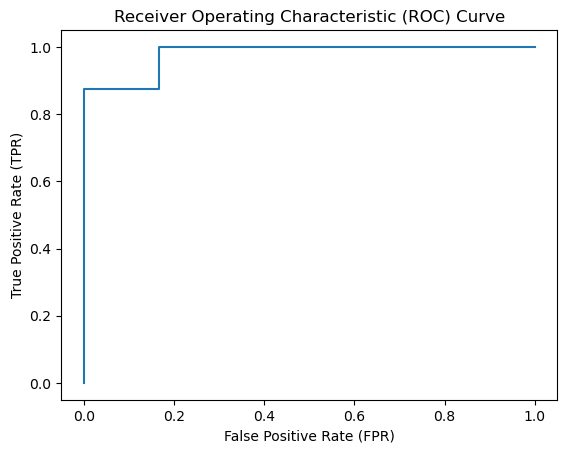

In [17]:
import matplotlib.pyplot as plt

def roc_curve_computer(true_labels, prediction_probabilities, thresholds):
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        predictions = predict(prediction_probabilities, threshold)
        TPR, FPR = TPR_FPR_score(true_labels, predictions)
        TPR_values.append(TPR)
        FPR_values.append(FPR)
    return TPR_values, FPR_values

# Define the threshold values
thresholds = [i*0.01 for i in range(100)]

# Compute TPR and FPR values
TPR_values, FPR_values = roc_curve_computer(labels, probs, thresholds)

# Plot ROC curve
plt.plot(FPR_values, TPR_values)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()


**Code Check:** As an example, calling the `roc_curve_computer` function with the input `true_labels = [1, 0, 1, 0, 0]`, `pred_probs = [0.875, 0.325, 0.6, 0.09, 0.4]`, and `thresholds = [0.00, 0.25, 0.50, 0.75, 1.00]` yields the output:

`TPR =  [1.0, 1.0, 1.0, 0.5, 0.0]` and `FPR =  [1.0, 0.6666, 0.0, 0.0, 0.0]`.

In [18]:
true_labels = [1, 0, 1, 0, 0]
pred_probs = [0.875, 0.325, 0.6, 0.09, 0.4]
thresholds = [0.00, 0.25, 0.50, 0.75, 1.00]

TPR_values, FPR_values = roc_curve_computer(true_labels, pred_probs, thresholds)

print("TPR: ", TPR_values)
print("FPR: ", FPR_values)

TPR:  [1.0, 1.0, 1.0, 0.5, 0.0]
FPR:  [1.0, 0.6666666666666666, 0.0, 0.0, 0.0]


Next, use your `roc_curve_computer` function along with the threshold values `thresholds = [x/100 for x in range(101)]` to compute the TPR and FPR lists for the provided data and save your output as `TPR` and `FPR`.

In [19]:
thresholds = [x/100 for x in range(101)]
TPR, FPR = roc_curve_computer(labels, probs, thresholds)

Use the following plotting function to plot the ROC curve.  Pass the TPR and FPR values that you calculated above into the plotting function to view the ROC curve.

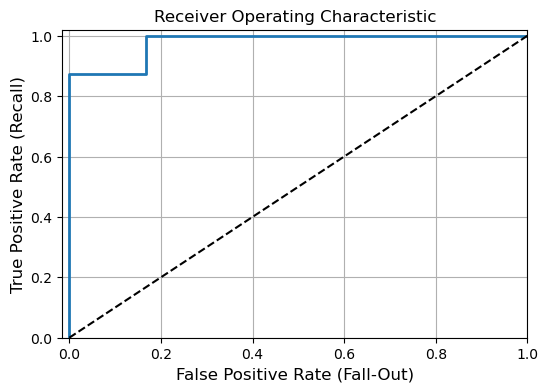

In [20]:
import matplotlib.pyplot as plt

def plot_roc_curve(tpr, fpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
    plt.title('Receiver Operating Characteristic', fontsize=12)
    plt.axis([-0.015, 1.0, 0, 1.02])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

plt.figure(figsize=(6, 4))
plot_roc_curve(TPR, FPR)
plt.show()

**Code Check:** Next, compare your plot to the plot generated by Scikit-Learn's `roc_curve` function.  Use Scikit-Learn's `roc_curve` function to calculate the false positive rates, the true positive rates, and the thresholds.  Save the output using sklearn's function as `fpr`, `tpr`, and `thresholds`.  

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(labels, probs)

Pass the false positive rates and the true positive rates obtained above via the Scikit-Learn function as input to the `plot_roc_curve` function in order to compare ROC curves. These two plots should look the same.

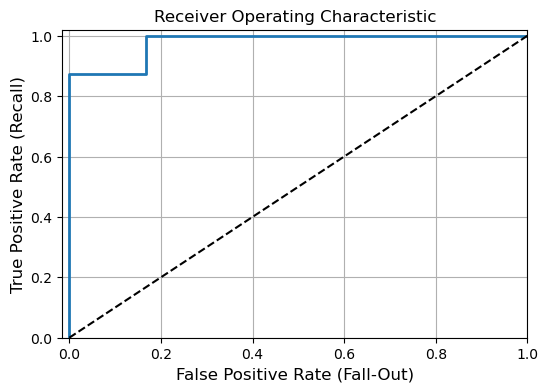

In [22]:
plt.figure(figsize=(6, 4))
plot_roc_curve(tpr, fpr)
plt.show()